In [5]:
import pandas as pd


In [21]:
solar_data = pd.read_csv('data/solarpower.csv')
display(solar_data.head())
solar_data.info()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 664 entries, 0 to 663
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       664 non-null    object 
 1   cum_power  664 non-null    float64
dtypes: float64(1), object(1)
memory usage: 10.5+ KB


In [20]:
for elem in range(solar_data['cum_power'].shape[0]):
    if solar_data['cum_power'].iloc[elem] == -1:
        solar_data['cum_power'].iloc[elem] = (solar_data['cum_power'].iloc[elem+1]+solar_data['cum_power'].iloc[elem-1])/2

display(round(solar_data['cum_power'].mean()))

23848

In [24]:
solar_data['date'] = pd.to_datetime(solar_data['date'], dayfirst=True)
solar_data['year_month'] = solar_data['date'].dt.to_period("M")
display(solar_data.head())

,date,cum_power,year_month
0,2017-01-01,20111.0,2017-01
1,2017-01-02,20112.0,2017-01
2,2017-01-03,20115.0,2017-01
3,2017-01-04,20117.0,2017-01
4,2017-01-05,20119.0,2017-01


In [37]:
solar_data['day_power'] = solar_data['cum_power'].diff()
solar_data['day_power']
day_power = solar_data.groupby(by='year_month')['day_power'].mean()
display(day_power)
display(round(day_power['2017-03']))

year_month
2017-01     3.233333
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64

11

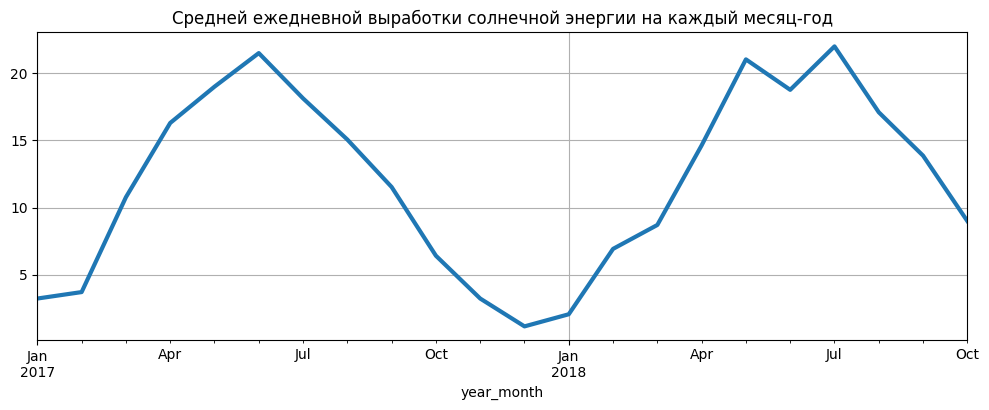

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

day_power.plot(
    kind='line',
    figsize=(12, 4),
    title='Cредней ежедневной выработки солнечной энергии на каждый месяц-год',
    grid = True,
    lw=3
);